In [1]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

### ¿Cómo ha evolucionado el número total de preprints publicados al mes a lo largo del tiempo?

In [11]:
preprints = (
    pd.read_csv("C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/Datasets/preprint-data.tsv", sep="\t")     # ajusta la ruta si hace falta
    .rename(columns={"Unnamed: 0": "archive"})
    .drop(columns="Unnamed: 136")
    .pipe(lambda df: pd.melt(
        df,
        id_vars="archive",
        value_vars=[col for col in df.columns if col != "archive"],
        var_name="year_month",
        value_name="submission"
    ))
    .assign(**{
        "month": lambda df: pd.to_datetime(df["year_month"], format="%Y-%m")
    })
    .drop(columns="year_month")
)

preprints.head()

,archive,submission,month
0,arXiv q-bio,40,2007-01-01
1,Nature Precedings,3,2007-01-01
2,F1000Research,0,2007-01-01
3,PeerJ Preprints,0,2007-01-01
4,bioRxiv,0,2007-01-01


In [12]:
preprints_total = (
    preprints
    .groupby("month", as_index=False)
    .agg(total_submission=("submission", "sum"))
    .sort_values("month")
)

preprints_total.head()

,month,total_submission
0,2007-01-01,43
1,2007-02-01,44
2,2007-03-01,55
3,2007-04-01,41
4,2007-05-01,59


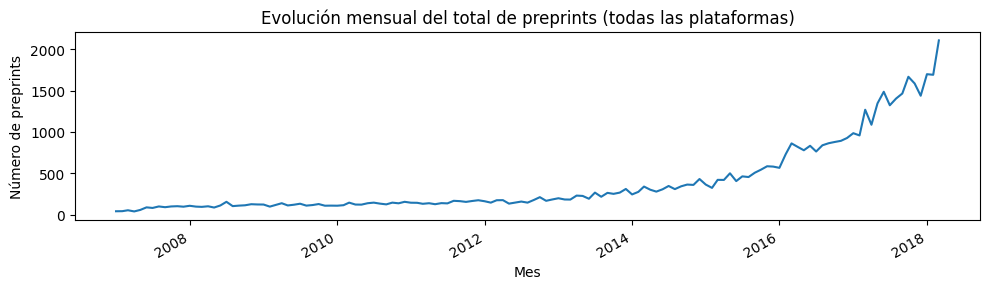

In [13]:
fig, ax = plt.subplots(figsize=(10, 3))

x = preprints_total["month"]
y = preprints_total["total_submission"]

ax.plot(x, y, marker="", linestyle="-")

ax.set_xlabel("Mes")
ax.set_ylabel("Número de preprints")
ax.set_title("Evolución mensual del total de preprints (todas las plataformas)")

ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()

plt.tight_layout()
plt.show()


#### ¿Cómo se han movido conjuntamente el índice de precios de la vivienda y el porcentaje de desempleo en California desde el año 2000?

In [14]:
house_prices = (
    pd.read_csv("C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/Datasets/house-prices.csv")
    .assign(**{
        "date": lambda df: pd.to_datetime(df["date"])
    })
)

house_prices.head()

,date,state,unemploy_perc,house_price_index,house_price_perc
0,1976-01-01,Alabama,6.7,37.138285,0.040405
1,1976-02-01,Alabama,6.7,37.756437,0.051806
2,1976-03-01,Alabama,6.6,38.276319,0.059302
3,1976-04-01,Alabama,6.5,38.596135,0.059585
4,1976-05-01,Alabama,6.4,38.740517,0.055723


In [15]:
california_ts = (
    house_prices
    .loc[lambda df: df["state"] == "California"]
    .loc[lambda df: df["date"].dt.year >= 2000]
)

california_ts.head()

,date,state,unemploy_perc,house_price_index,house_price_perc
2304,2000-01-01,California,5.0,88.509968,0.127271
2305,2000-02-01,California,5.0,88.853482,0.121319
2306,2000-03-01,California,5.0,90.312861,0.125757
2307,2000-04-01,California,5.1,91.961279,0.129754
2308,2000-05-01,California,5.1,93.471634,0.131737


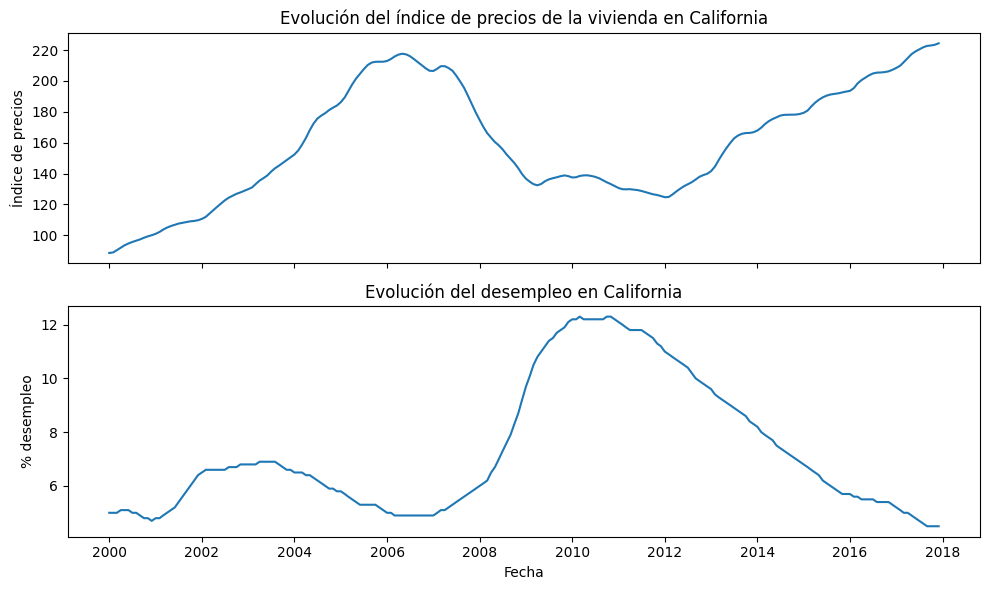

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Índice de precios de vivienda
ax1.plot(california_ts["date"], california_ts["house_price_index"])
ax1.set_ylabel("Índice de precios")
ax1.set_title("Evolución del índice de precios de la vivienda en California")

# Porcentaje de desempleo
ax2.plot(california_ts["date"], california_ts["unemploy_perc"])
ax2.set_ylabel("% desempleo")
ax2.set_xlabel("Fecha")
ax2.set_title("Evolución del desempleo en California")

plt.tight_layout()
plt.show()